In [3]:

from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

## 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars


In [18]:
import numpy as np
x = np.linspace(10,100,10)

## Setting the slope

In [19]:
a = 0.7

In [20]:
y = line(a,x,0,errors)


Text(0.5,1,'Errorbars')

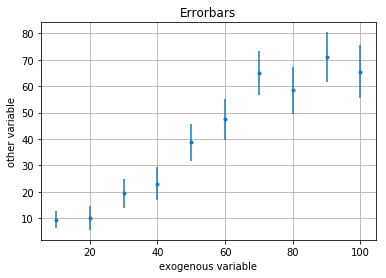

In [39]:
from pylab import *
ax = pl.figure()
pl.grid(True)
pl.errorbar(x,y,yerr=errors(x),fmt='.')
pl.ylabel('other variable')
pl.xlabel('exogenous variable')
pl.title("Errorbars")
#ax.set_axis_bgcolor("y"), Help on Changing the color of the plot to grey would be appreciated. 

 Errorbar plots for slope = 0.7, intercept = 0 and uncertainties as errorbars

## 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [40]:
print("y:",y)

y: [  9.41313017  10.02466368  19.3770597   23.12768878  38.67654423
  47.53049315  64.85856368  58.51906305  70.96448029  65.51431963]


In [41]:
print("x:",x)

x: [  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


In [42]:
z=sm.add_constant(x)
print("x:",z)

x: [[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


## 3. use statsmodels.api.OLS to fit x and y
## a. the wrong way: by passing x as exogenous variable
## b. the right way: by passing statsmodels.api.add_constant(x) as exogenous variable
## and print the model summary for each and discuss the differences

In [43]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     552.5
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           2.18e-09
Time:                        11:05:11   Log-Likelihood:                -31.961
No. Observations:                  10   AIC:                             65.92
Df Residuals:                       9   BIC:                             66.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7467      0.032     23.505      0.000         0.675     0.819
==============================================================================
Omnibus:                        1.664   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.435   Jarque-Bera (JB):                0.509
Skew:                           0.552   Prob(JB):                        0.775
Kurtosis:                       2.975   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#THE RIGHT WAY
smfit1 = smf.OLS(y, z).fit()
smfit1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     111.3
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           5.68e-06
Time:                        11:05:51   Log-Likelihood:                -31.914
No. Observations:                  10   AIC:                             67.83
Df Residuals:                       8   BIC:                             68.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.2409      4.495     -0.276      0.789       -11.606     9.124
x1             0.7644      0.072     10.552      0.000         0.597     0.931
==============================================================================
Omnibus:                        1.329   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.301
Skew:                           0.425   Prob(JB):                        0.860
Kurtosis:                       3.002   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. plot the data (as points) and both statsmodels fits


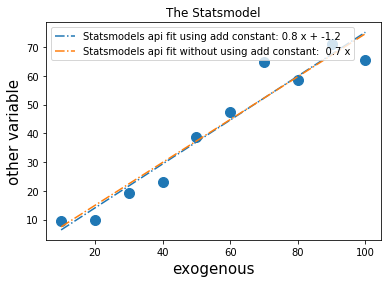

In [50]:
#Creating a plot of the first statmodel fits 
## Had to take help for this block of code from ks5063
alpha0_sm, alpha1_sm = smfit1.params
alpha2_sm=smfit.params
pl.scatter(x,y,s=100)
pl.xlabel(r'exogenous', fontsize=15)
pl.ylabel(r'other variable', fontsize=15)
pl.plot(x, x * alpha1_sm + alpha0_sm, '-.',
        label=r"Statsmodels api fit using add constant: %.1f x + %.1f"\
       %(alpha1_sm, alpha0_sm))
pl.plot(x, x * alpha2_sm, '-.',
        label=r"Statsmodels api fit without using add constant:  %.1f x"\
       %(alpha2_sm))
pl.plot
pl.title(r'The Statsmodel')
pl.legend()

## 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars


In [51]:
c = a * 100
p=line(a,x,c,errors)

Text(0.5,1,'Errorbars')

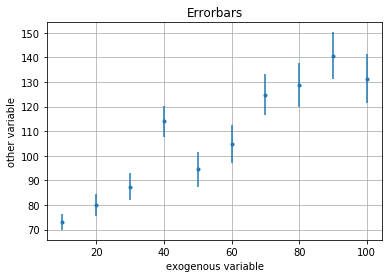

In [52]:
from pylab import *
ax = pl.figure()
pl.grid(True)
pl.errorbar(x,p,yerr=errors(x),fmt='.')
pl.ylabel('other variable')
pl.xlabel('exogenous variable')
pl.title("Errorbars")

## 6. repeat step 3


In [53]:
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     552.5
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           2.18e-09
Time:                        11:22:47   Log-Likelihood:                -31.961
No. Observations:                  10   AIC:                             65.92
Df Residuals:                       9   BIC:                             66.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7467      0.032     23.505      0.000         0.675     0.819
==============================================================================
Omnibus:                        1.664   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.435   Jarque-Bera (JB):                0.509
Skew:                           0.552   Prob(JB):                        0.775
Kurtosis:                       2.975   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#THE RIGHT WAY
smfit1 = smf.OLS(y, z).fit()
smfit1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     111.3
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           5.68e-06
Time:                        11:23:05   Log-Likelihood:                -31.914
No. Observations:                  10   AIC:                             67.83
Df Residuals:                       8   BIC:                             68.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.2409      4.495     -0.276      0.789       -11.606     9.124
x1             0.7644      0.072     10.552      0.000         0.597     0.931
==============================================================================
Omnibus:                        1.329   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.301
Skew:                           0.425   Prob(JB):                        0.860
Kurtosis:                       3.002   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


## 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

## you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the inverse (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [55]:
import statsmodels.regression.linear_model as lm

In [56]:
def weights(x):
    n =np.sqrt(x)
    return 1/(np.std(n)**2)

In [57]:
lmfit1 = smf.WLS(y, z,weights(x)).fit()
lmfit1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            WLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     111.3
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           5.68e-06
Time:                        11:29:32   Log-Likelihood:                -31.914
No. Observations:                  10   AIC:                             67.83
Df Residuals:                       8   BIC:                             68.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.2409      4.495     -0.276      0.789       -11.606     9.124
x1             0.7644      0.072     10.552      0.000         0.597     0.931
==============================================================================
Omnibus:                        1.329   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.301
Skew:                           0.425   Prob(JB):                        0.860
Kurtosis:                       3.002   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""